In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'mtcars.xlsx')

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.isna().any()

model    False
mpg      False
cyl      False
disp     False
hp       False
drat     False
wt       False
qsec     False
vs       False
am       False
gear     False
carb     False
dtype: bool

#from sklearn.preprocessing import Imputer
mean_imputer = Imputer(missing_values = np.nan,strategy = 'mean',axis = 1)
mean_imputer = mean_imputer.fit(df)
imputed_df = mean_imputer.transform(df.values)
df = pd.DataFrame(data = imputed_df, columns = cols)
df

In [9]:
df.shape

(32, 12)

In [10]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


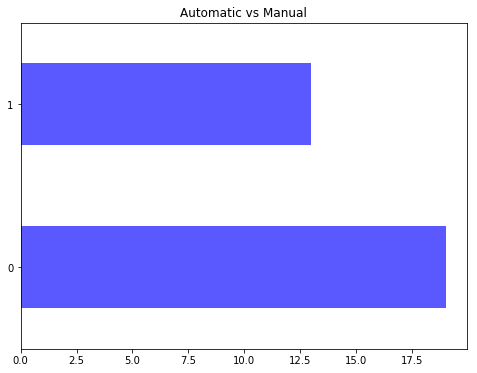

In [27]:
plt.figure(figsize=(8,6))
df.am.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Automatic vs Manual")
plt.show()

In [9]:
df[['am','model']].groupby('am').describe().unstack()

               am
model  count   0                     19
               1                     13
       unique  0                     19
               1                     13
       top     0     Cadillac Fleetwood
               1               Fiat 128
       freq    0                      1
               1                      1
dtype: object

In [39]:
df['am'].value_counts()

0    19
1    13
Name: am, dtype: int64

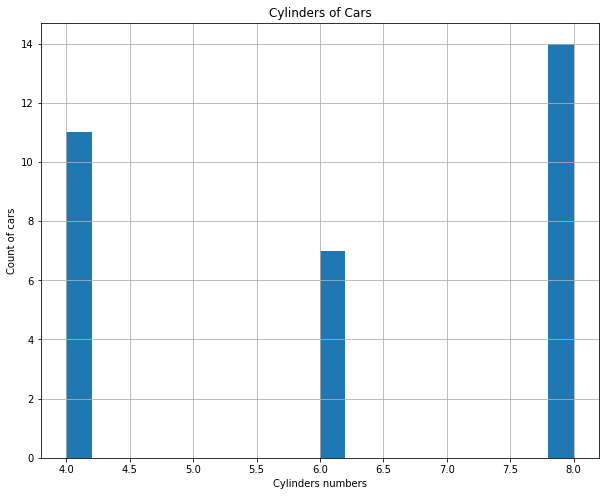

In [46]:
plt.figure(figsize=(10,8))
df['cyl'].hist(bins=20)
plt.title("Cylinders of Cars")
plt.xlabel("Cylinders numbers")
plt.ylabel("Count of cars")
plt.show()

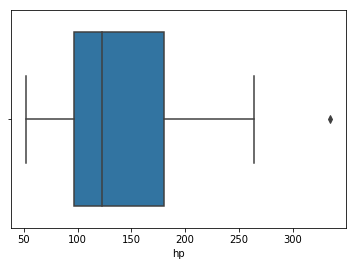

In [8]:
sns.boxplot(x = df['hp'])

for columns in df:
    plt.figure()
    df.boxplot(columns)

In [19]:
filter = df['hp'].values > 300
df_outlier_rem = df[filter]
df_outlier_rem

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


# Salary Code

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
salary_employee = pd.read_excel(r'Salary.xlsx')

In [22]:
salary_employee.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [39]:
salary_employee.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

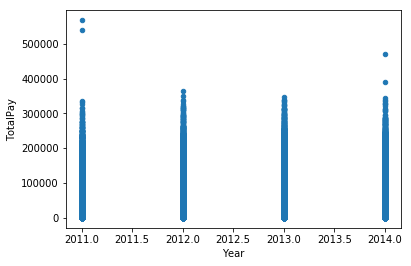

In [42]:
salary_employee.plot.scatter(x='Year', y ='TotalPay')

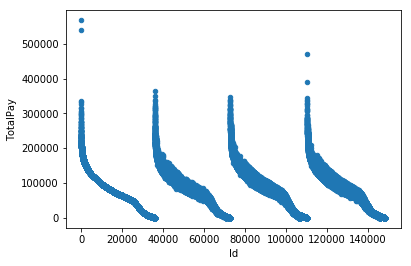

In [43]:
salary_employee.plot.scatter(x='Id', y ='TotalPay')

In [50]:
salary_employee.groupby(['EmployeeName','Year'])['TotalPay'].sum()

EmployeeName            Year
A BERNARD FATOOH        2011     20039.91
A Bernard  Fatooh       2013     23923.62
A Bernard Fatooh        2012     18500.19
                        2014     24061.35
A ELIZABETH MARCHASIN   2011     26282.86
A JAMIL NIAZI           2011     87496.21
A K Finizio             2014     25854.81
A. JAMES ROBERTSON II   2011     19473.92
A. James  Robertson Ii  2013     22601.80
A. James Robertson Ii   2012     22065.71
A.K.  Finizio           2013     13763.93
AARIC PINGREE           2011     36883.91
AAROM PEVERILL          2011      3266.33
AARON BALLONADO         2011    127281.97
AARON BRINKERHOFF       2011     87619.12
AARON CHAPMAN           2011     68808.28
AARON CHEN              2011     16789.37
AARON COWHIG            2011    122613.42
AARON CRAIG             2011     66133.86
AARON CRAMER            2011    129494.13
AARON DEL TREDICI       2011    131880.60
AARON DICKERSON         2011     79391.34
AARON DOSS              2011    128193.26
AARON